In [1]:
from FindDataFunctions import *
import matplotlib.pyplot as plt

In [15]:
path = "/home/helge/Applications/matsim/matsim_results_ssd/PeriodicBC/8DrtCap/OwnIntermodalAccEgr/CarbonIndex/VaryingEll/LongLinkRouting/VaryE/Uniform2000Mean100SpacingToLBy2/"
path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/bimodal/output/CILocalEllipses/100000reqs/3000dist/1500drt/3000dcut/3000l/"
car_path = "/scratch01.local/hheuer/matsim-bimodal/scenarios/fine_grid/bimodal/output/CILocalEllipses/100000reqs/3000dist/car/"
bim_dirs = getDirs(path, [], [])[0]
car_dir = getDirs(path, [], [])[0][0]

In [16]:
idx = 0
print("Ell: ", getEll(bim_dirs[idx]['root']))
trips_bim = getTrips(bim_dirs[idx], "bimodal") 
modes_bim = trips_bim["modes"]
pt_in_trips = modes_bim.str.contains("pt")
tt_bim = trips_bim["trav_time"]
rt_bim = tt_bim - trips_bim["wait_time"]
tt_car = getTrips(car_dir, "car")["trav_time"]

Ell:  3000


In [17]:
# display(tt_bim[tt_bim<tt_car])
# def mapBool2Color(x):
#     if x:
#         return 0.1
#     else:
#         return 0
# pt_in_trips_colors = pt_in_trips.apply(mapBool2Color)
# display(pt_in_trips_colors)

<IPython.core.display.Javascript object>


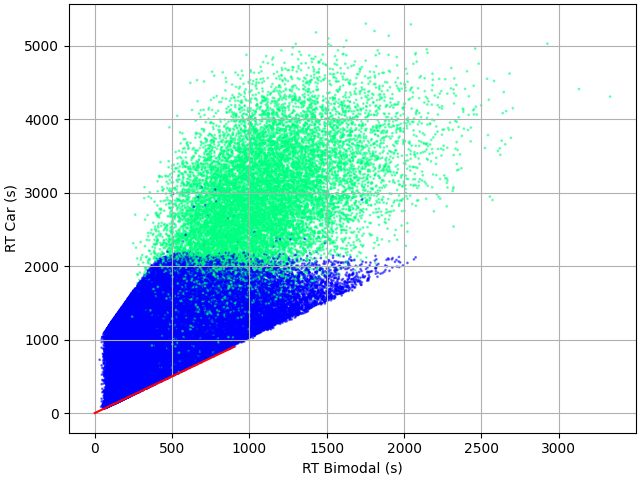

In [18]:
from matplotlib.colors import LogNorm
%matplotlib notebook

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(rt_bim.sort_index(), tt_car.sort_index(), alpha=0.5, s=1, c=pt_in_trips, cmap="winter")
ax.set_xlabel("RT Bimodal (s)")
ax.set_ylabel("RT Car (s)")
# im = ax.hexbin(
#     tt_bim,
#     tt_car,
#     #     gridsize=(nx, ny),
#     gridsize=25,
#     cmap="hot_r",
#     norm=LogNorm(),
#     #     extent=(xmin, xmax, ymin, ymax),
# )
# fig.colorbar(im, ax=ax, location="bottom")

ax.plot([0, 900], [0,900], c="r")
ax.grid()

# fig.savefig("RTScatterPlotEll.png", dpi=200)

plt.show()